<a href="https://colab.research.google.com/github/lusekelok/diveintocode-ml/blob/master/Analysis%20of%20housing%20information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Analysis of housing information

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#[Problem 1] Obtaining a dataset
df1_=pd.read_csv('/content/sample_data/train.csv')
print (df1_)

        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]


In [3]:
#[Problem 2] Investigating the dataset itself


This is training data on house prices and sales. It also has attribute data pertaining to the houses such as type of access roads, shape of the house and etc.

In [4]:
#[Problem 3] Checking the data
print(df1_.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [5]:
print(dir(df1_))

['Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SalePrice', 'SaleType', 'ScreenPorch', 'Street', 'T', 'TotRmsAbvGrd', 'TotalBsmtSF',

In [6]:
print(df1_.SalePrice)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [7]:
desc_ = df1_.describe()
print(desc_)

                Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]


In [8]:
#[Problem 4] Dealing with missing values

import missingno as msno

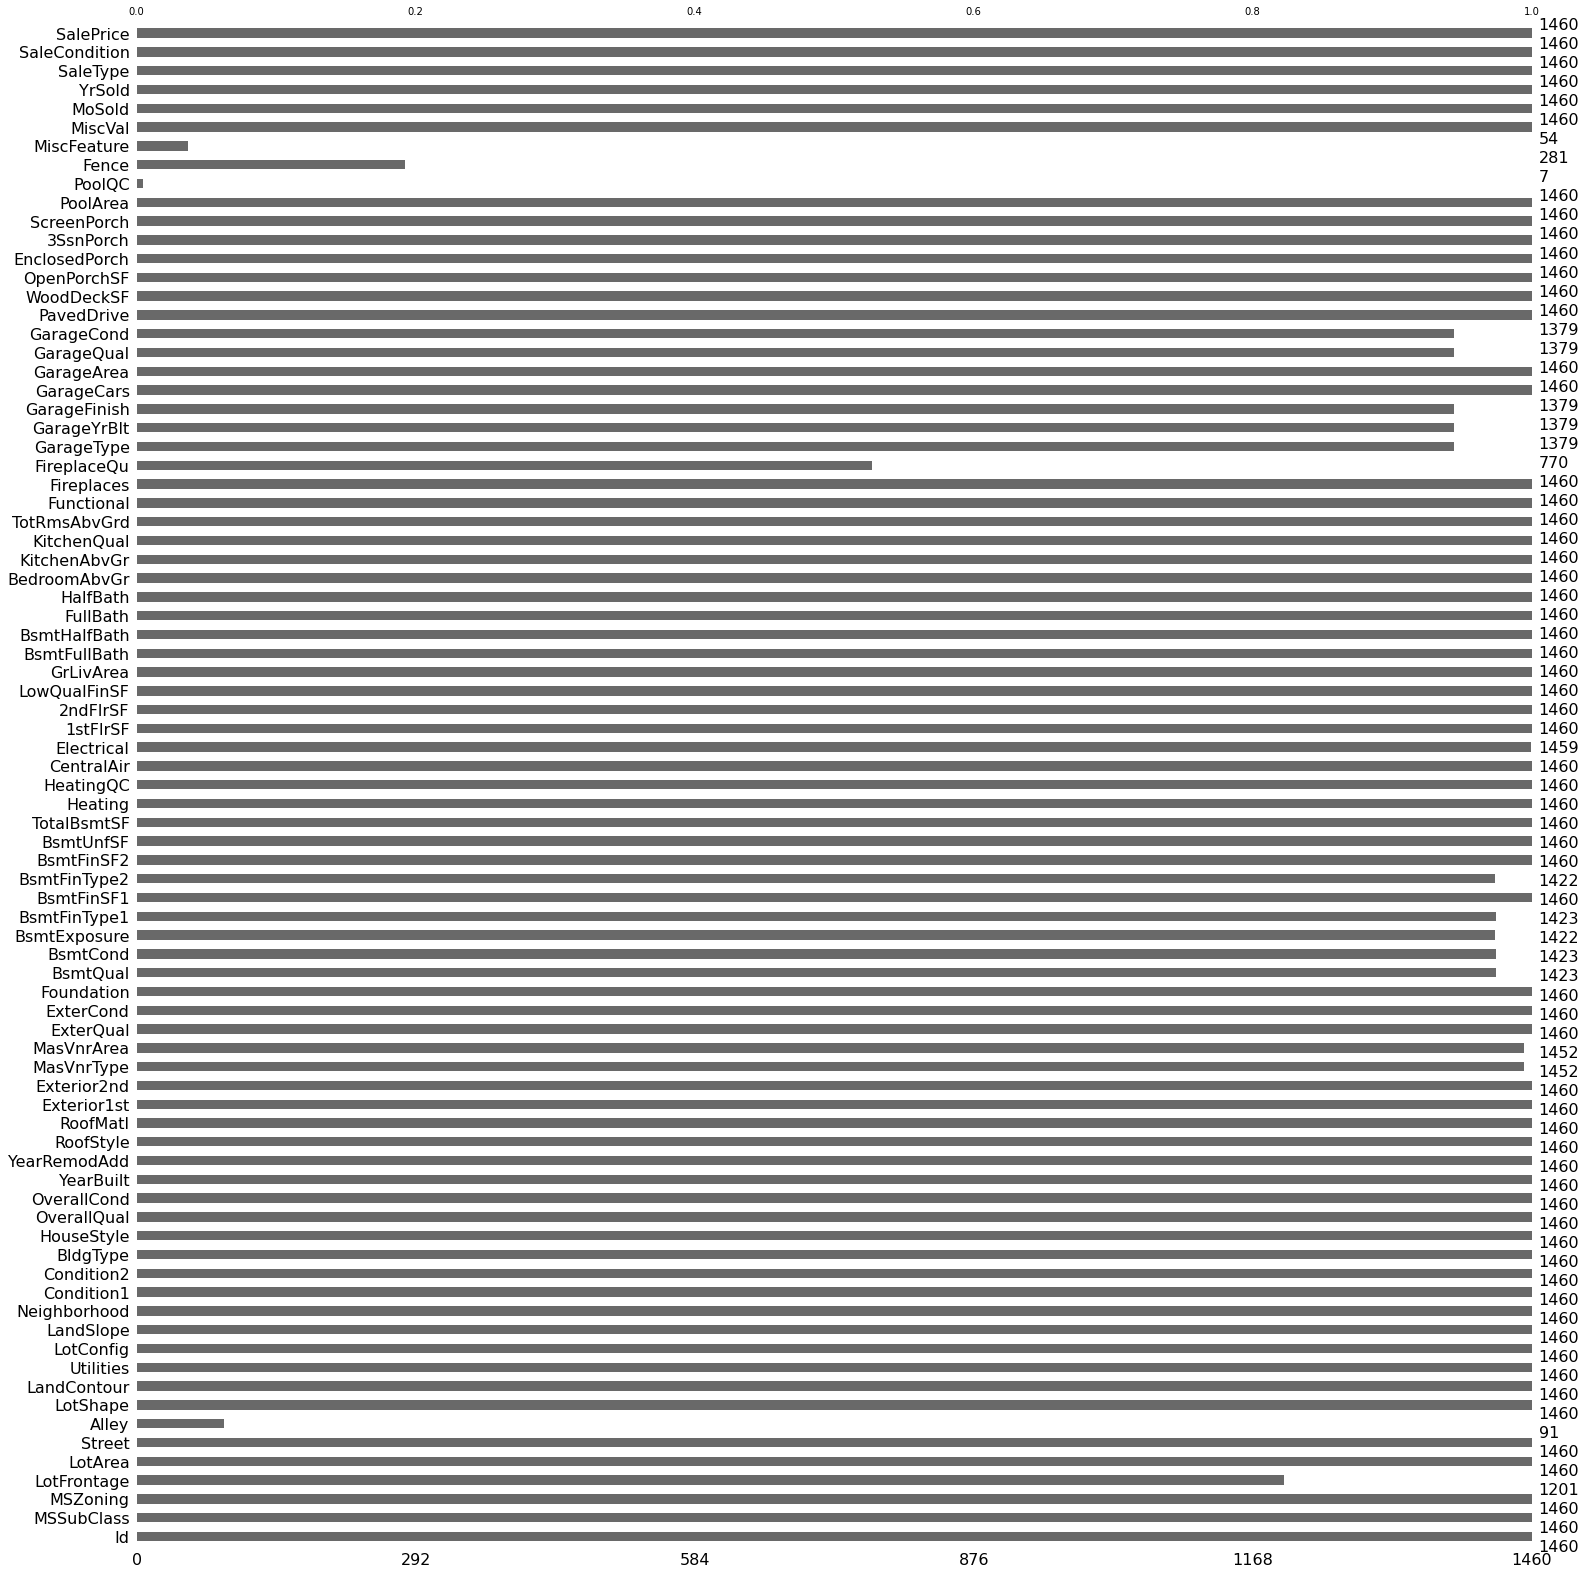

In [9]:
msno.bar(df1_);   #checking number of missing data using missingno function

In [10]:
df1_missing_total = df1_.isnull().sum() #checking the number of missing data per column using null function
print(df1_missing_total)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [11]:
df1_missing_percent = df1_.isnull().mean()*100
print(df1_missing_percent)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


In [13]:
#missing data
total = df1_.isnull().sum().sort_values(ascending=False)
percent = (df1_.isnull().sum()/df1_.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Ratio'])
missing_data.head(60)

,Total,Missing Ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [14]:
missing_data.drop(missing_data[missing_data.Total >= 5].index, inplace=True)
missing_data.head(60)

,Total,Missing Ratio
Electrical,1,0.000685
Utilities,0,0.000000
YearRemodAdd,0,0.000000
MSSubClass,0,0.000000
Foundation,0,0.000000
ExterCond,0,0.000000
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000
RoofMatl,0,0.000000


In [15]:
#[Problem 5] Researching terminology

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers.

In [16]:
#[Problem 6] Confirming distribution
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


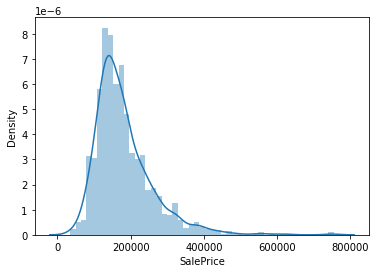

In [17]:
sns.distplot(df1_['SalePrice']);

In [18]:
var = 'SalePrice'
print("Skewness :", df1_[var].skew()) #Calculating and showing the skewness
print("Kurtosis :", df1_[var].kurt()) #Calculating and showing the kurtosis

Skewness : 1.8828757597682129
Kurtosis : 6.536281860064529


Skewness : 0.12133506220520406
Kurtosis : 0.8095319958036296


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


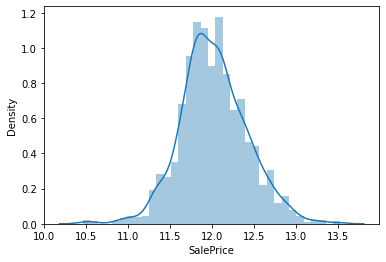

In [19]:
log_target = df1_[var].apply(np.log) # logarithmic transformation
sns.distplot(log_target) #Checking the distribution after the transformation. You will realize that we have a normal distribution.
print("Skewness :", log_target.skew()) #Calculating and showing the skewness after the logarithmic transformation
print("Kurtosis :", log_target.kurt()) #Calculating and showing the kurtosis after the logarithmic transformation

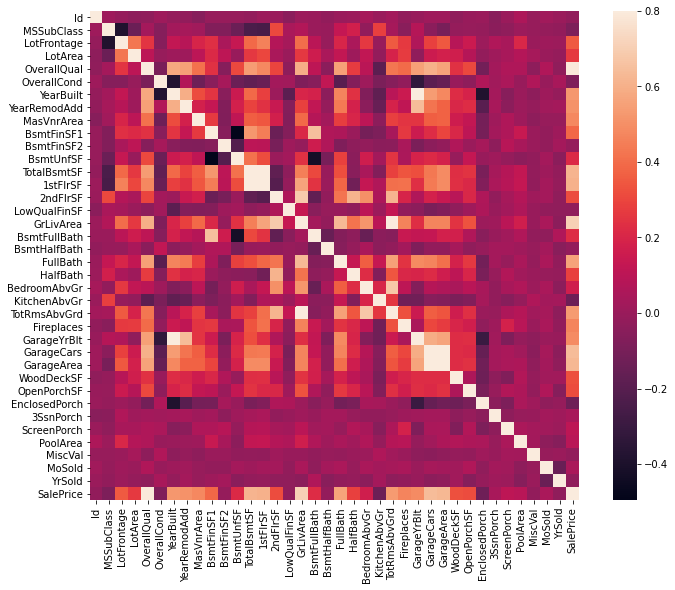

In [20]:
#[Problem 7] Confirming the correlation coefficient
#Create a heat map of the correlation coefficient matrix and find the relationships with high correlation coefficients

#Make a heat map of the correlation coefficient matrix (1)

#correlation matrix
corrmat = df1_.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);   #to view correlations using heatmap visualisation

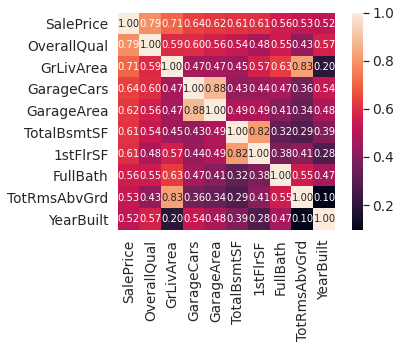

In [21]:
#Select 10 features that have a high correlation with the target variable, and create a correlation coefficient matrix heat map for these

#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df1_[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [22]:
#Summarize whether the 10 selected features represent something by referring to the description in Kaggle's DataDescription.



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


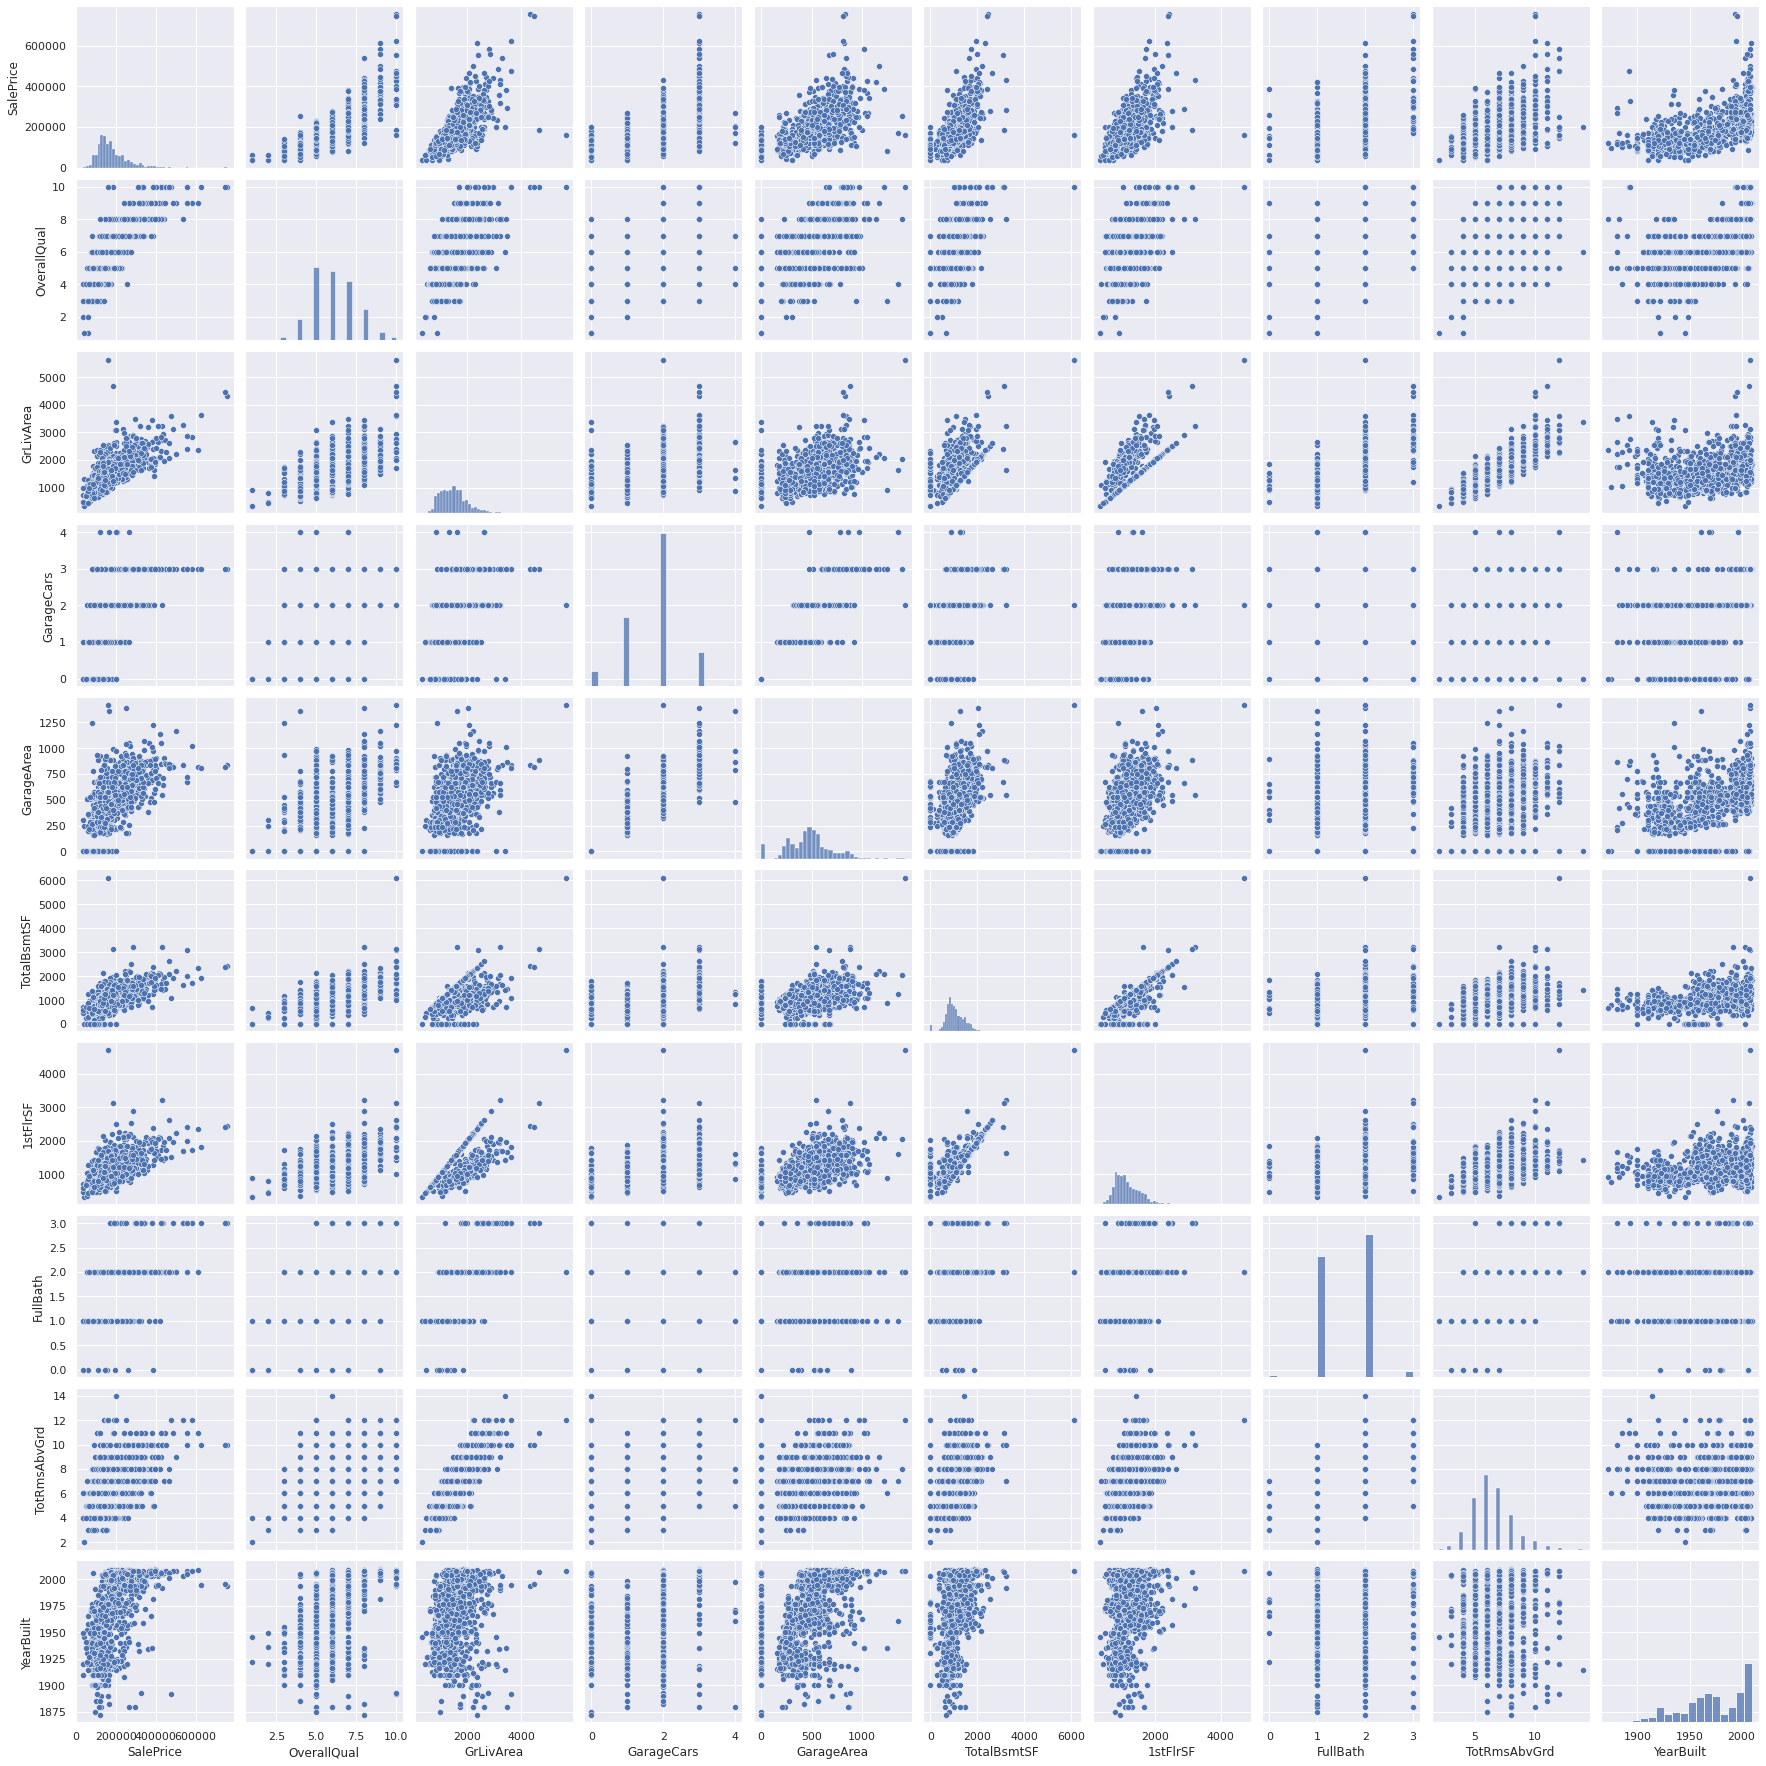

In [28]:
#Find 3 combinations of the 10 selected features that have high correlation coefficients with each other

#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(df1_[cols], size = 2.5)
plt.show();